In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [4]:
os.getcwd()

'C:\\Users\\sebne\\OneDrive\\Documents\\FHWN_Tulln\\DataAnalysis\\repo\\src\\notebooks'

In [43]:
nir_results_snv_plus = pd.read_json("../../temp/nir_model_output_snv_plus_baseline.json")
nir_results_original = pd.read_json("../../temp/nir_model_output.json")
mir_results = pd.read_json("../../temp/mir_model_output.json")

In [44]:
pls_results1 = pd.read_json("../../temp/pls_fillpeaks_metrics.json")
pls_results2 = pd.read_json("../../temp/pls_detrend_metrics.json")
pls_results3 = pd.read_json("../../temp/pls_snv_metrics.json")
pls_results4 = pd.read_json("../../temp/pls_als_metrics.json")
pls_results5 = pd.read_json("../../temp/pls_msc_metrics.json")

pls_results = pd.concat([pls_results1,pls_results2,pls_results3,pls_results4,pls_results5])
pls_results = pd.json_normalize(pls_results['models'])

pls_results['model_name'] = pls_results['model_name'].str[0]
pls_results['baseline_corr'] = pls_results['baseline_corr'].str[0]
pls_results['RMSEP'] = pls_results['RMSEP'].str[0]
pls_results['R2'] = pls_results['R2'].str[0]
pls_results['training_time'] = pls_results['training_time'].str[0]

pls_renamed = pls_results.rename(columns={"model_name": "model", "RMSEP": "RMSE"})

In [45]:
def r_squared_pivot(regression_results, pls_results): 
    results_heatmap = regression_results[["model","baseline_corr","R2"]]
    results_heatmap_pls = pls_results[["model","baseline_corr","R2"]]
    
    results_heatmap = pd.concat([results_heatmap,results_heatmap_pls])
    pivot = results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'R2')
    return pivot

In [8]:
def r_squared_pivot(regression_results): 
    results_heatmap = regression_results[["model","baseline_corr","R2"]]
    
    pivot = results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'R2')
    return pivot

In [46]:
def rmse_pivot(regression_results, pls_results): 
    results_heatmap = regression_results[["model","baseline_corr","RMSE"]]
    results_heatmap_pls = pls_results[["model","baseline_corr","RMSE"]]
    
    results_heatmap = pd.concat([results_heatmap,results_heatmap_pls])
    pivot = results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'RMSE')
    return pivot

In [10]:
def plot_heatmap(pivot, title):
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".3f")
    plt.title(f'{title}')
    plt.show()

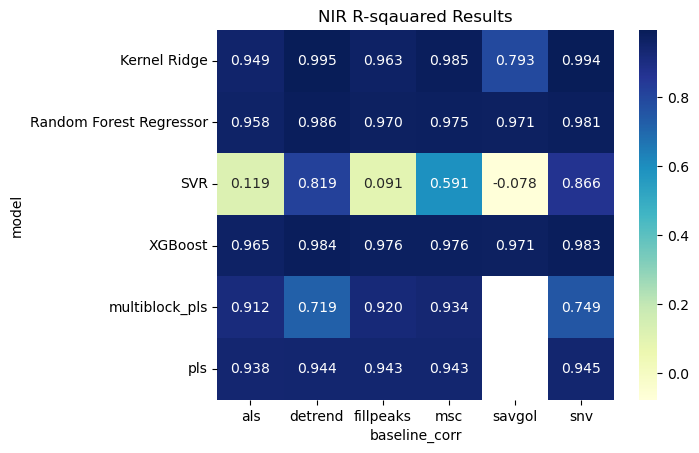

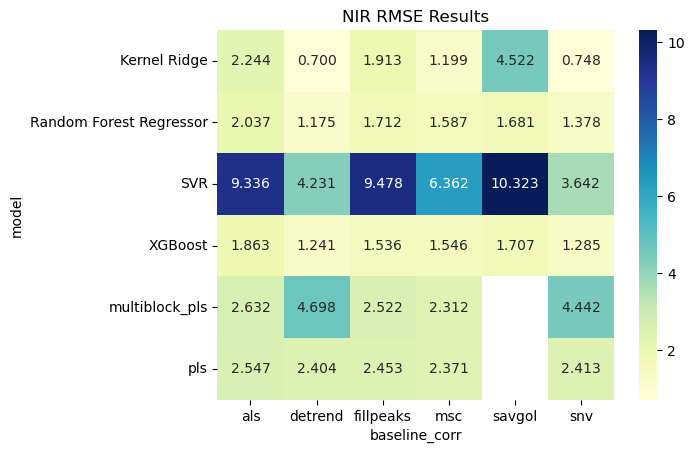

In [48]:
pivot = r_squared_pivot(nir_results_original, pls_renamed)
plot_heatmap(pivot, title='NIR R-sqauared Results')

pivot = rmse_pivot(nir_results_original, pls_renamed)
plot_heatmap(pivot, title='NIR RMSE Results')

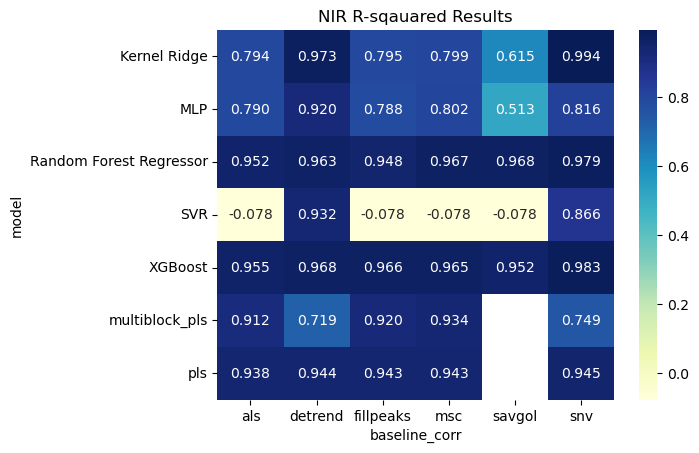

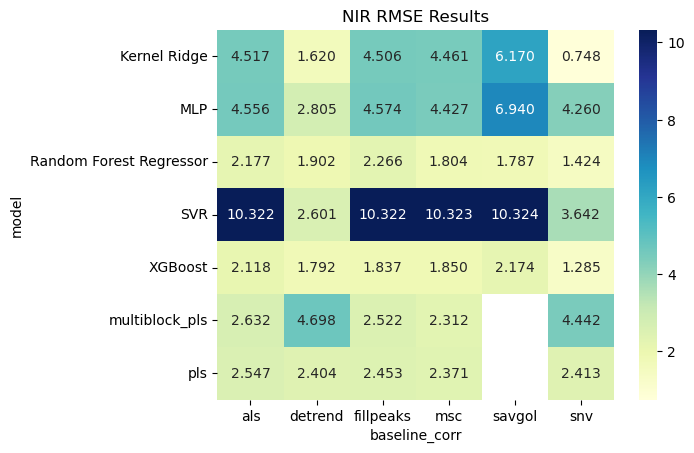

In [49]:
pivot = r_squared_pivot(nir_results_snv_plus, pls_renamed)
plot_heatmap(pivot, title='NIR R-sqauared Results')

pivot = rmse_pivot(nir_results_snv_plus, pls_renamed)
plot_heatmap(pivot, title='NIR RMSE Results')

In [6]:
mir_results_heatmap = mir_results[["model","baseline_corr","R2"]]
pivot_rsquared = mir_results_heatmap.pivot_table(index = 'model', columns = 'baseline_corr', values = 'R2')
mir_results_heatmap_time = mir_results[["model","baseline_corr","training_time"]]
pivot_time = mir_results_heatmap_time.pivot_table(index = 'model', columns = 'baseline_corr', values = 'training_time')

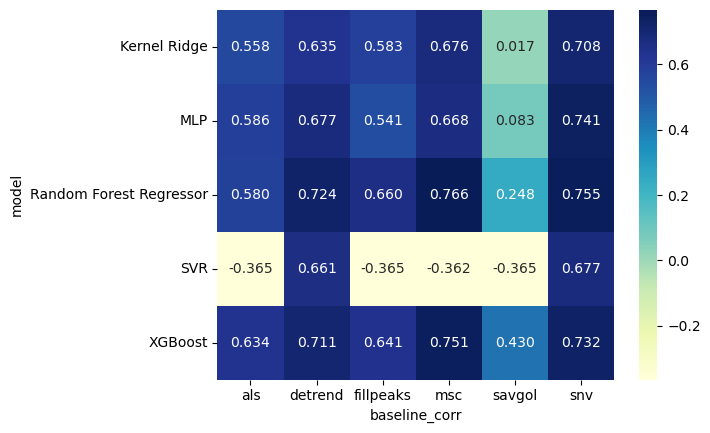

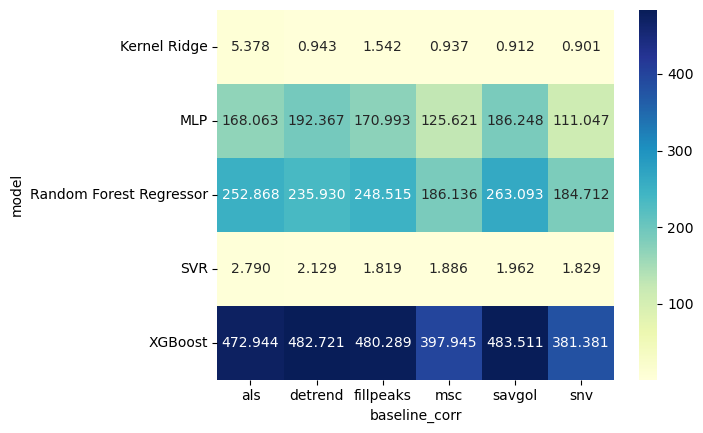

In [7]:
sns.heatmap(pivot_rsquared, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()
sns.heatmap(pivot_time, cmap="YlGnBu", annot=True, fmt=".3f")
plt.show()

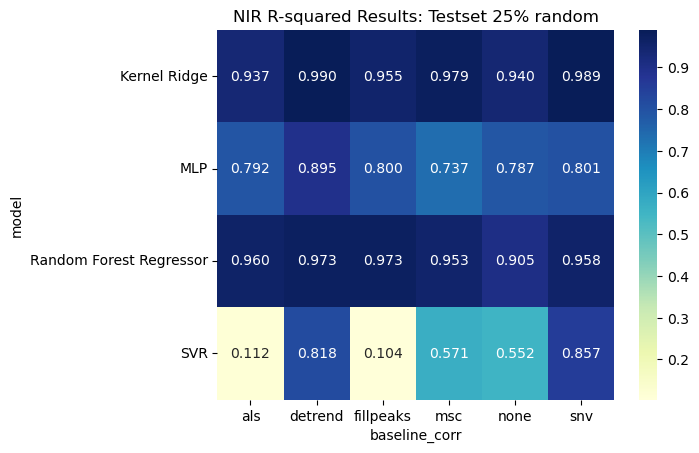

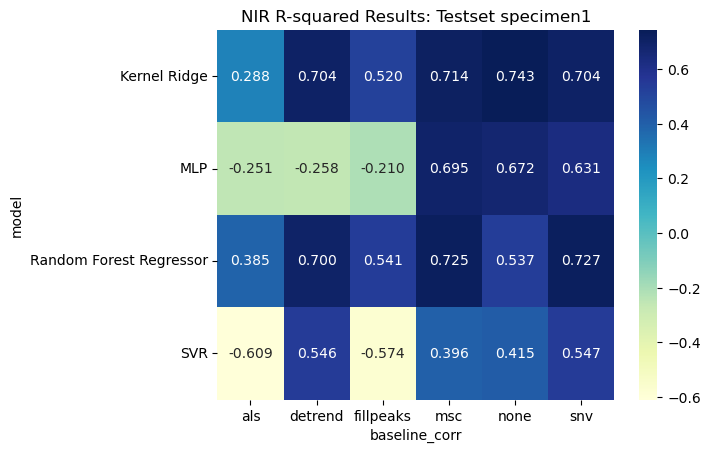

In [11]:
nir_random_split = pd.read_json("../../output/model_output_random_split25.json")
nir_specimen_split = pd.read_json("../../output/model_output_test_specimen1.json")
pivot_random = r_squared_pivot(nir_random_split)
plot_heatmap(pivot_random, title='NIR R-squared Results: Testset 25% random')
pivot_specimen = r_squared_pivot(nir_specimen_split)
plot_heatmap(pivot_specimen, title='NIR R-squared Results: Testset specimen1')

In [5]:
my_files = ["../../output/model_output_random_split25.json", "../../temp/pls_metrics.json"]
util.merge_json_files(my_files, output_file="all_models.json")

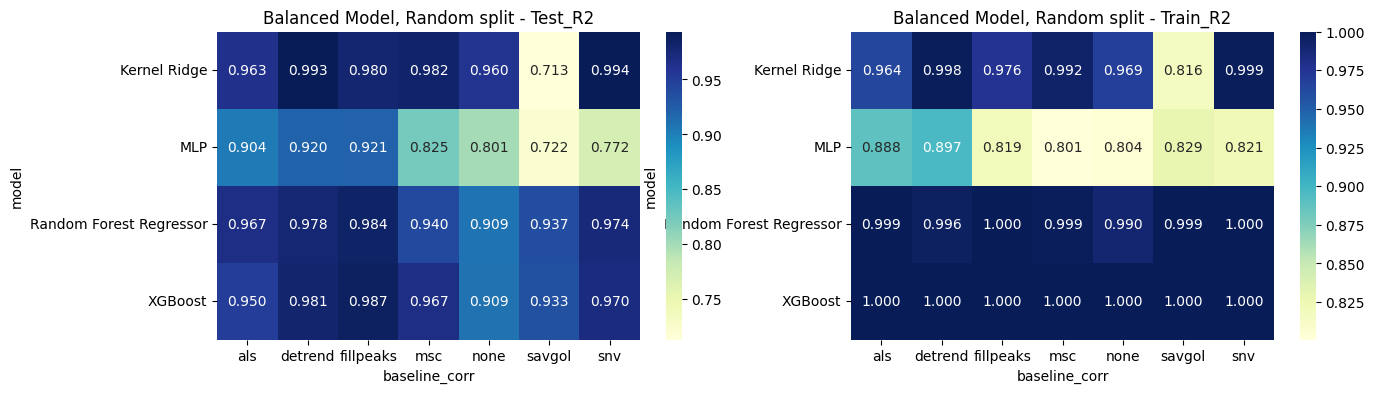

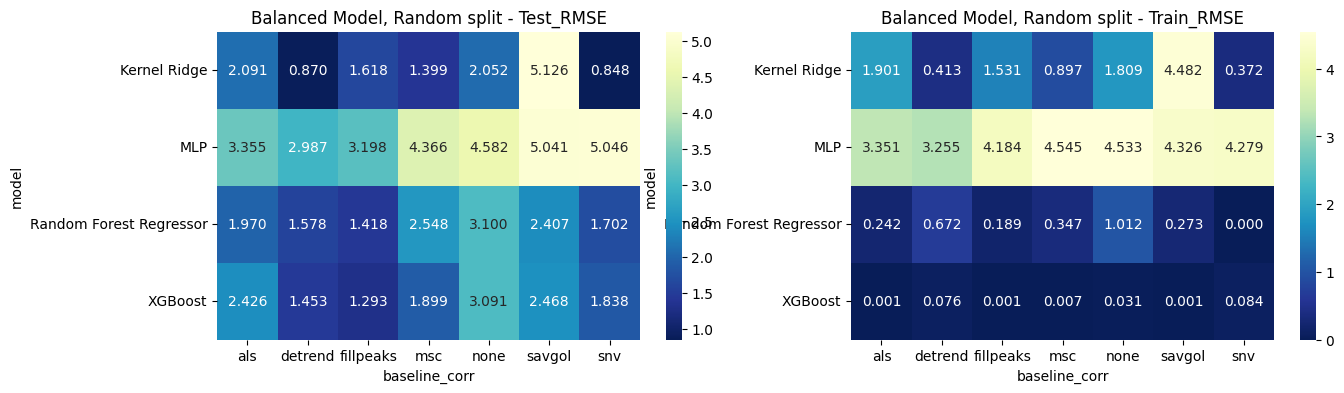

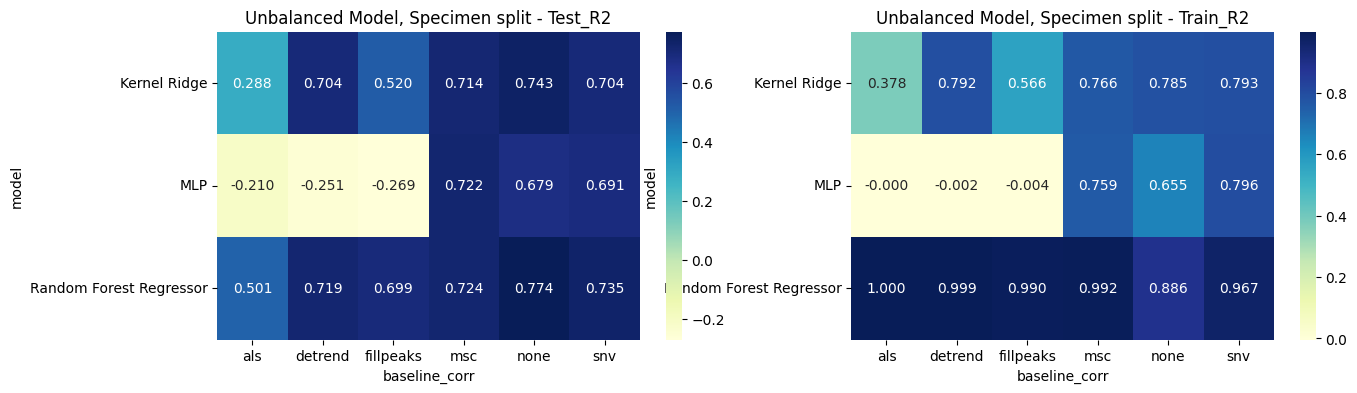

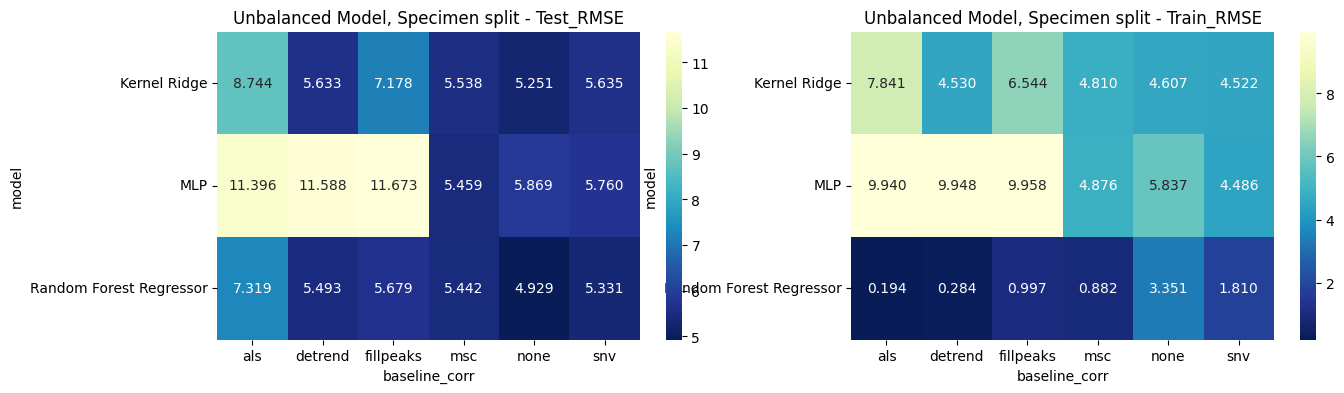

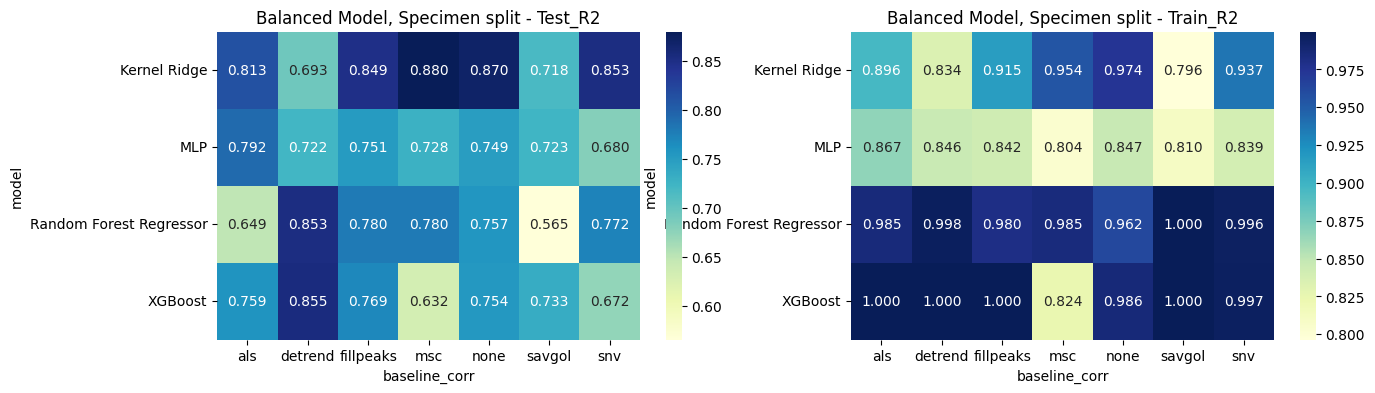

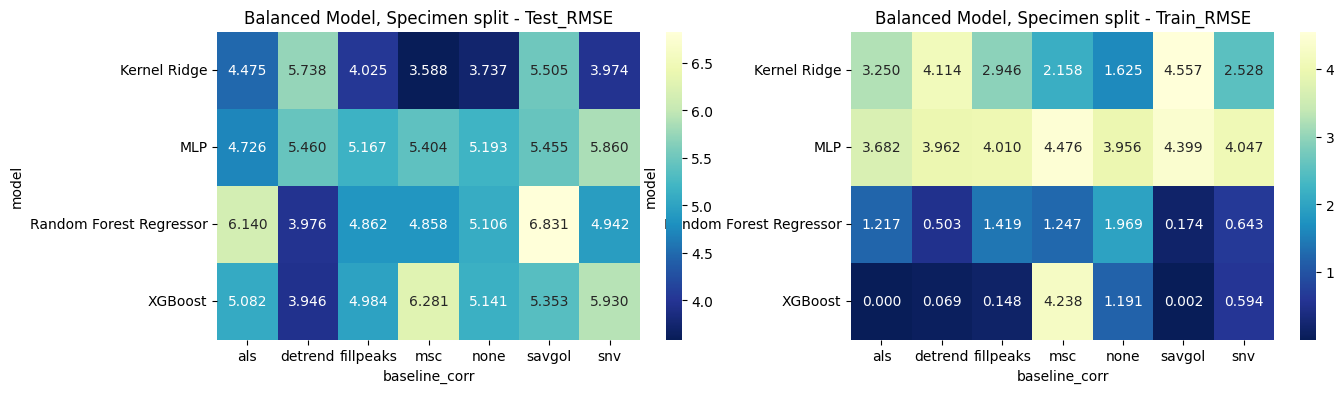

In [ ]:
def show_train_test_heatmap(model_results, title, left_metric = "Test_R2", right_metric = "Train_R2", cmap = "YlGnBu"):
    pivot = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    ax1, ax2 = axes
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax1)
    ax1.set_title(f"{title} - {left_metric}")
    pivot = plot_util.create_model_performance_pivot(model_results, metric=right_metric)
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax2)
    ax2.set_title(f"{title} - {right_metric}")
    plt.show()

balanced_random = pd.read_json("../../temp/result_collection/model_output_balanced_random.json")
show_train_test_heatmap(balanced_random, "Balanced Model, Random split")
show_train_test_heatmap(balanced_random, "Balanced Model, Random split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

unbalanced_specimen1 = pd.read_json("../../temp/result_collection/model_output_unbalanced_specimen1.json")
show_train_test_heatmap(unbalanced_specimen1, "Unbalanced Model, Specimen split")
show_train_test_heatmap(unbalanced_specimen1, "Unbalanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

balanced_specimen1 = pd.read_json("../../temp/result_collection/model_output_balanced_specimen1.json")
show_train_test_heatmap(balanced_specimen1, "Balanced Model, Specimen split")
show_train_test_heatmap(balanced_specimen1, "Balanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")
